# Предсказание болезней сердца

https://www.kaggle.com/volodymyrgavrysh/heart-disease

### Импортирование библиотек


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Чтобы разделить выборку, используем `train_test_split`.

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Используем алгоритмы:
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Импорт выборки

Выборка скачано и названа `dataset.csv`. Используем pandas `read_csv`, чтобы прочесть csv.

In [166]:
dataset = pd.read_csv('dataset.csv')

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [168]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


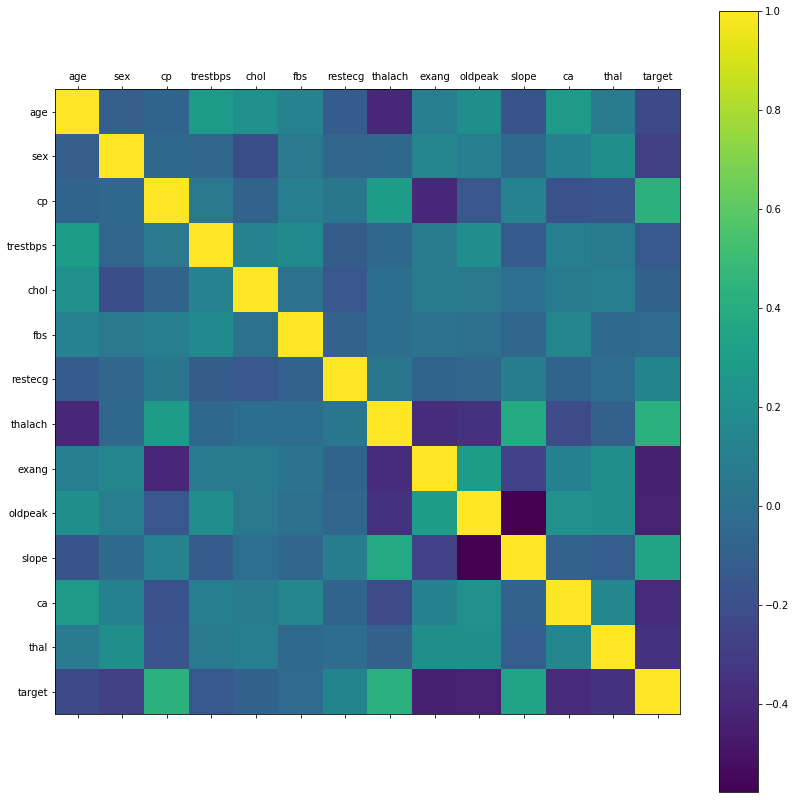

In [169]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Взглянув на матрицу корреляции выше, легко увидеть, что некоторые функции имеют отрицательную корреляцию с целевым значением, в то время как некоторые имеют положительную.
Далее посмотрим гистограммы для каждой переменной.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB7760F908>,
      dtype=object)

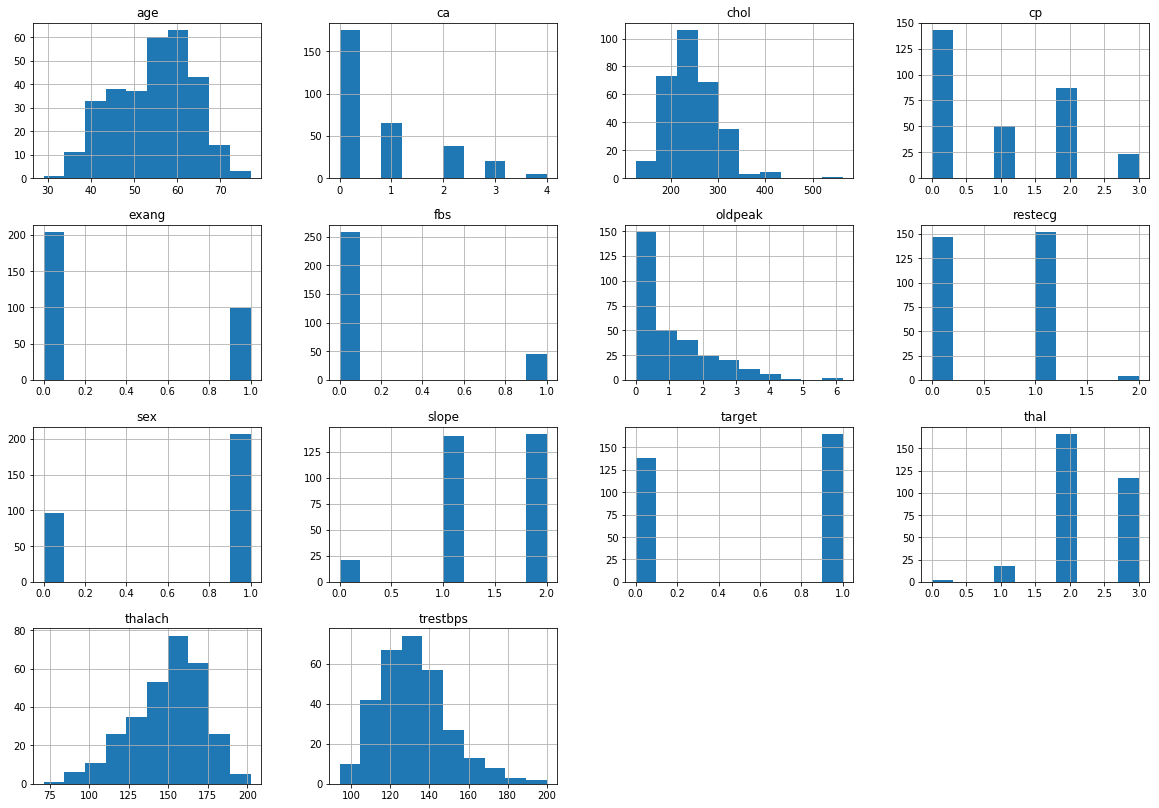

In [170]:
dataset.hist()

Взглянув на гистограммы выше, я вижу, что у каждой функции свой диапазон распределения. Таким образом, использование масштабирования до наших прогнозов должно быть очень полезным. Кроме того, категориальные особенности действительно выделяются.

Text(0.5, 1.0, 'Количество каждого класса')

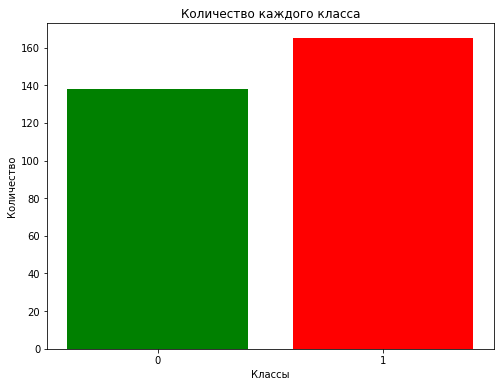

In [171]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.title('Количество каждого класса')

In [172]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [173]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [174]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print(X_train[0:5])

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
252  0.841908    0   0  0.364165  0.922521    1        1 -1.908699      0   
54   0.952197    0   2  0.192827  0.110850    0        0  0.977514      0   
234  1.724218    1   0 -0.092738  1.463634    0        0 -1.777508      0   
18  -1.253580    1   0  1.049520  0.014223    0        1  0.933783      0   
205 -0.260980    1   0 -0.206964  0.168827    0        1  0.496478      1   

      oldpeak  slope  ca  thal  
252  0.742260      1   3     2  
54  -0.896862      2   0     2  
234  1.173608      1   3     2  
18   0.397182      2   0     2  
205 -0.896862      2   1     3  


#### K Neighbors Classifier



In [175]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier')

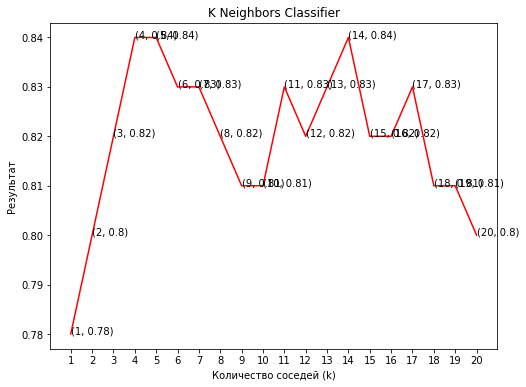

In [176]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Количество соседей (k)')
plt.ylabel('Результат')
plt.title('K Neighbors Classifier')

Максимальный результат `0.84` для 4 соседей.

In [177]:
print("Результат для K Neighbors Classifier {}% с {} соседями.".format(knn_scores[3]*100, 4))

Результат для K Neighbors Classifier 84.0% с 4 соседями.


#### Support Vector Classifier

In [178]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Посмотрим какое наилучшее

Text(0.5, 1.0, 'Support Vector Classifier для разных ядер')

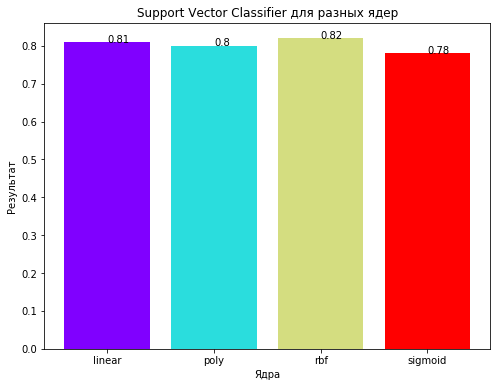

In [179]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Ядра')
plt.ylabel('Результат')
plt.title('Support Vector Classifier для разных ядер')

`rbf` наилучший

In [180]:
print("Результат для Support Vector Classifier {}% с {} ядром.".format(svc_scores[2]*100, 'rbf'))

Результат для Support Vector Classifier 82.0% с rbf ядром.


#### Decision Tree Classifier

Проверим для разных `max_features` и выберем наилучший.

In [181]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier для разного числа максимальных признаков')

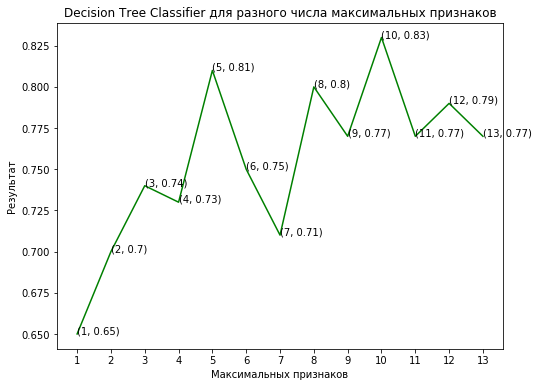

In [182]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Максимальных признаков')
plt.ylabel('Результат')
plt.title('Decision Tree Classifier для разного числа максимальных признаков')

In [183]:
print("Результат для Decision Tree Classifier {}% с {} максимальными признаками.".format(dt_scores[9]*100, 10))

Результат для Decision Tree Classifier 83.0% с 10 максимальными признаками.


#### Random Forest Classifier



In [184]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier для разного числа оценщиков')

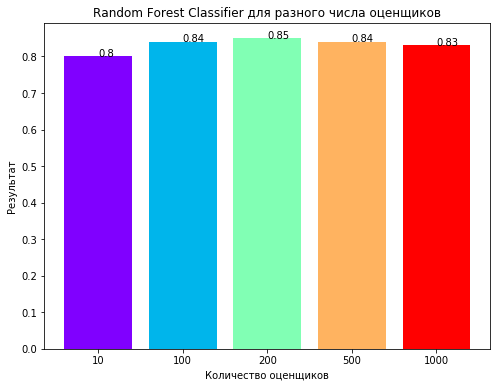

In [185]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Количество оценщиков')
plt.ylabel('Результат')
plt.title('Random Forest Classifier для разного числа оценщиков')

In [186]:
print("Результат для Random Forest Classifier {}% с {} оценщиками.".format(rf_scores[2]*100,200))

Результат для Random Forest Classifier 85.0% с 200 оценщиками.


### Итог

`Random Forest Classifier` показал наилучший результат `85%` с 200 оценщиками.

In [187]:
check = [51,0,2,140,308,0,0,142,0,1.5,2,1,2]

In [188]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)
print(rf_classifier.predict([check]))

[1]


# Как связаны болезни сердца и содержание сахара в крови?

In [189]:
dataset = pd.read_csv('dataset.csv')
age = pd.cut(dataset['age'],6,labels=["(28.952, 37.0)", "(37.0, 45.0)", "(45.0, 53.0)","(53.0, 61.0)","(61.0, 69.0)", "(69.0, 77.0)"])

In [190]:
cross1=pd.crosstab([dataset['fbs'],dataset['target']],[age]).style.background_gradient(cmap='summer_r')
cross1